<h1 align=center> MilliQan Uproot Tutorial</h1>

This jupyter notebook was developed for the 6th MilliQan conference as a tutorial for using the MilliQan data and analysis framework. The framework has been built using the uproot package. Uproot allows root files to be read in as either awkward arrays, numpy arrays, or pandas dataframes. This facilitates faster columnar analysis on the data. 

For more information on uproot see the documentation and a tutorials given by J Pivarski and Mason Proffitt below.

[1] https://uproot.readthedocs.io/en/latest/ <br>
[2] https://github.com/jpivarski-talks/2021-06-14-uproot-awkward-columnar-hats/blob/main/2-uproot.ipynb <br>
[3] https://masonproffitt.github.io/uproot-tutorial/aio/index.html 

For more information on awkward arrays see the awkward array documentation and tutorial by J Pivarski below.

[1] https://awkward-array.org/doc/main/user-guide/index.html <br>
[2] https://github.com/jpivarski-talks/2021-06-14-uproot-awkward-columnar-hats/blob/main/3-awkward-array.ipynb


## Useful Documents

### Channel Mapping
<img src="channelMapping.png" alt="Alternative text" />


## Importing Packages

The first step will be to import all packages we need. The root and uproot packages are both necessary for our purposes.

To load our files with uproot we also need at least one of awkward, numpy, or pandas. We can easily switch between these different formats and use different packages for different tasks. 

We will also import the hist and matplotlib.pyplot packages to make histograms.

Finally we will use the array package to allow us to fill root histograms.

In [2]:
import ROOT as r
import uproot

import hist
import matplotlib.pyplot as plt

import awkward as ak
import numpy as np
import pandas as pd

import array as arr

Welcome to JupyROOT 6.28/04


## Opening File with Uproot

First we need to download our root file, we will use run 1190 which contains beam-on data. Then we can open our root file and load in the correct tree the same way we do with traditional root. 

In [8]:
import os

if not os.path.isfile('MilliQan_Run1190_v34.root'):
    print("Downloading our example file...")
    filePath = 'https://cernbox.cern.ch/s/7aVy5emV9tivPrl/download'
    os.system("wget -O $PWD/MilliQan_Run1190_v34.root {0} ".format(filePath))
else:
    print("We already have our file!")


We already have our file!


In [9]:
upfile = uproot.open("MilliQan_Run1190_v34.root") #load the root file
uptree = upfile["t"] #open the tree "t"
uptree.show() #print out all branches

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
event                | int32_t                  | AsDtype('>i4')
runNumber            | int64_t                  | AsDtype('>i8')
fileNumber           | int64_t                  | AsDtype('>i8')
boardsMatched        | bool                     | AsDtype('bool')
DAQEventNumber       | int32_t                  | AsDtype('>i4')
daqFileOpen          | uint64_t                 | AsDtype('>u8')
daqFileClose         | uint64_t                 | AsDtype('>u8')
totalFillLumi        | float                    | AsDtype('>f4')
fillId               | int32_t                  | AsDtype('>i4')
beamType             | TString                  | AsStrings()
beamEnergy           | float                    | AsDtype('>f4')
betaStar             | float                    | AsDtype('>f4')
beamOn               | bool                     | AsDtype('b

Note that in the above print out showing our root file there is also a list of types. There are some types that are vectors and others that are not. For most python dataframes this would cause an issue (numpy, pandas), however the awkward array package was designed to solve this issue. In the same event we can have arrays of different sizes saved. 

In [10]:
#Optionally we can load in the tree at the same time we load the file by appending ":\<treename>\" to the end of the file

uptree = uproot.open("MilliQan_Run1190_v34.root:t")

There are some other useful functions for looking at the contents of our tree. 

In [11]:
uptree.keys() #print the branches

['event',
 'runNumber',
 'fileNumber',
 'boardsMatched',
 'DAQEventNumber',
 'daqFileOpen',
 'daqFileClose',
 'totalFillLumi',
 'fillId',
 'beamType',
 'beamEnergy',
 'betaStar',
 'beamOn',
 'fillStart',
 'fillEnd',
 'triggerThreshold',
 'triggerEnable',
 'triggerMajority',
 'triggerLogic',
 'dynamicPedestal',
 'sidebandMean',
 'sidebandRMS',
 'maxThreeConsec',
 'chan',
 'chanWithinBoard',
 'row',
 'column',
 'layer',
 'type',
 'board',
 'height',
 'area',
 'pickupFlag',
 'pickupFlagTight',
 'nPE',
 'riseSamples',
 'fallSamples',
 'ipulse',
 'npulses',
 'time',
 'timeFit',
 'time_module_calibrated',
 'timeFit_module_calibrated',
 'duration',
 'delay',
 'max',
 'present',
 'event_trigger_time_tag',
 'event_time',
 'event_time_fromTDC',
 'v_groupTDC_g0',
 'v_groupTDC_g1',
 'v_groupTDC_g2',
 'v_groupTDC_g3',
 'v_groupTDC_g4',
 'v_groupTDC_g5',
 'v_groupTDC_g6',
 'v_groupTDC_g7',
 'tClockCycles',
 'tTime',
 'tStartTime',
 'tTrigger',
 'tTimeDiff',
 'tMatchingTimeCut',
 'tEvtNum',
 'tRunNum

In [12]:
uptree.typenames() #print branches and type

{'event': 'int32_t',
 'runNumber': 'int64_t',
 'fileNumber': 'int64_t',
 'boardsMatched': 'bool',
 'DAQEventNumber': 'int32_t',
 'daqFileOpen': 'uint64_t',
 'daqFileClose': 'uint64_t',
 'totalFillLumi': 'float',
 'fillId': 'int32_t',
 'beamType': 'TString',
 'beamEnergy': 'float',
 'betaStar': 'float',
 'beamOn': 'bool',
 'fillStart': 'uint64_t',
 'fillEnd': 'uint64_t',
 'triggerThreshold': 'std::vector<float>',
 'triggerEnable': 'std::vector<bool>',
 'triggerMajority': 'std::vector<int32_t>',
 'triggerLogic': 'std::vector<int32_t>',
 'dynamicPedestal': 'std::vector<float>',
 'sidebandMean': 'std::vector<float>',
 'sidebandRMS': 'std::vector<float>',
 'maxThreeConsec': 'std::vector<float>',
 'chan': 'std::vector<int32_t>',
 'chanWithinBoard': 'std::vector<int32_t>',
 'row': 'std::vector<int32_t>',
 'column': 'std::vector<int32_t>',
 'layer': 'std::vector<int32_t>',
 'type': 'std::vector<int32_t>',
 'board': 'std::vector<int32_t>',
 'height': 'std::vector<float>',
 'area': 'std::vector<

### Selecting Branches

We can also select specific branches by using the arrays method of uproot. Note that in the below example we can also create a cut, set the library to use, and determine how many events to load.

library = data format to load branches into. Options are awkward (ak, default), pandas (pd), and numpy (np). <br>
cut = string making a cut on the data, cut is applied at this time <br>
entry_stop = sets the number of events to load <br>

In [13]:
#using numpy

branches = uptree.arrays(["height", "area"], library="np", entry_stop=1) #note that making a cut here cannot be done
branches #print numpy array

{'height': array([array([  31.783669,   39.405895,   13.095359,   26.717552,  140.2456  ,
                 44.905266,  271.96484 ,   68.273026,   50.518803,   11.808123,
                 11.194355,   12.174236, 1271.4152  , 1271.679   ,   92.209274,
                 13.671067], dtype=float32)                                    ],
       dtype=object),
 'area': array([array([1.2054480e+03, 1.1246801e+03, 1.8389778e+02, 9.8011853e+02,
               6.1905723e+03, 1.5279357e+03, 9.0815225e+03, 1.5125280e+03,
               6.7102985e+02, 5.8576851e+01, 1.4745975e+02, 8.2188019e+01,
               5.4123918e+04, 9.0477211e+04, 4.4827510e+03, 6.6807976e+01],
              dtype=float32)                                               ],
       dtype=object)}

In [14]:
#using pandas

branches = uptree.arrays(["height", "area"], library="pd", entry_stop=10) #note that making a cut here cannot be done
branches #print pandas dataframe

,height,area
0,"[31.783668518066406, 39.4058952331543, 13.0953...","[1205.447998046875, 1124.6800537109375, 183.89..."
1,"[1250.4808349609375, 46.19087600708008, 68.531...","[70824.625, 1055.309814453125, 1792.3759765625..."
2,"[18.267715454101562, 25.468421936035156]","[50.21216583251953, 68.24801635742188]"
3,"[41.91587448120117, 58.44866943359375, 38.3878...","[1238.1187744140625, 1987.6187744140625, 1182...."
4,"[1248.293212890625, 19.603918075561523, 349.06...","[82731.6875, 255.3837432861328, 12854.43359375..."
5,"[594.494140625, 90.06787109375, 1249.473266601...","[25615.44140625, 3769.640380859375, 80643.2890..."
6,"[67.95349884033203, 183.73922729492188, 72.034...","[1010.6024780273438, 9996.771484375, 2006.5627..."
7,"[35.43406677246094, 342.0281066894531, 1072.92...","[1058.7940673828125, 9912.9697265625, 42932.64..."
8,"[430.8191833496094, 16.063304901123047, 797.25...","[16883.04296875, 128.42327880859375, 45818.957..."
9,[15.313374519348145],[44.623260498046875]


In [15]:
#using awkward

branches = uptree.arrays(["height", "area"], cut="height >= 500", entry_stop=100000)
branches[:10] #print first 10 events

<Array [{height: [...], area: [...]}, ...] type='10 * {height: var * float3...'>

We can also make more cuts by defining a cut and then applying it to our branches. The cut will be arrays of booleans for each pulse that we can then apply to our data to "make the cut".

In [16]:
area_cut = branches['area'] >= 500 #cut requires area >= 500 pulse by pulse
height_cut = branches['height'] >= 700 #cut requires height >= 700 pulse by pulse
area_cut #print the area cut

<Array [[True, True], ..., [True, True, True]] type='100000 * var * bool'>

In [17]:
branches_cut = branches[area_cut] #here we make the cut by saving only those pulses that have a True value for the cut
branches_cut #print

<Array [{height: [...], area: [...]}, ...] type='100000 * {height: var * fl...'>

We can make a quick plot of this data by using the hist package. First we need to define our histogram (bins, start, stop) the same as in root. Then we need to fill the histogram with a flattened awkward array.

In [18]:
h1 = hist.Hist.new.Reg(1000, 0, 200000, name="Area").Double()
h1.fill(ak.flatten(branches_cut['area']))

Hist(Regular(1000, 0, 200000, name='Area'), storage=Double()) # Sum: 160307.0 (168611.0 with flow)

In [19]:
branches_cut = branches[area_cut & height_cut] #here we apply both the area and height cuts with & (can also use either with |, and not with ~)
branches_cut #print

<Array [{height: [...], area: [...]}, ...] type='100000 * {height: var * fl...'>

In [20]:
h1 = hist.Hist.new.Reg(1000, 0, 200000, name="Area").Double()
h1.fill(ak.flatten(branches_cut['area']))

Hist(Regular(1000, 0, 200000, name='Area'), storage=Double()) # Sum: 134542.0 (142846.0 with flow)

## Plotting

### Hist Package

The hist package is designed to quickly make plots in jupyter notebooks.

In [21]:
#Define a histogram
h1 = hist.Hist.new.Reg(130, 0, 1300, name="Height").Double()
h1.fill(ak.flatten(branches['height']))

Hist(Regular(130, 0, 1300, name='Height'), storage=Double()) # Sum: 167984.0 (168611.0 with flow)

### MatPlotlib

We can also use matplotlib plots to take advantage of python tools for plotting.

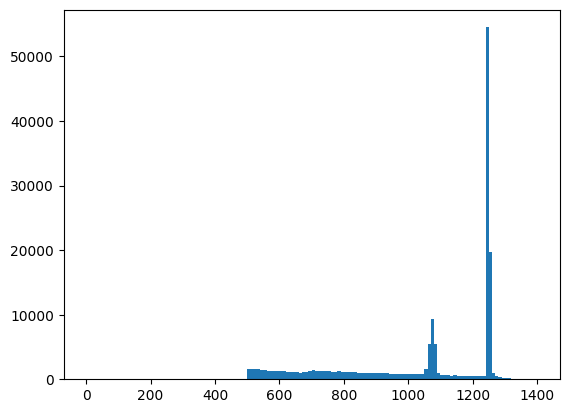

In [22]:
plt.hist(ak.flatten(branches['height']), bins=140, range=(0, 1400))
plt.show()

### Root Histograms

Finally we can still use root histograms by converting our entries to array objects. This method of plotting is a bit slow but allows us to use the traditional root tools and save our histograms to root files.

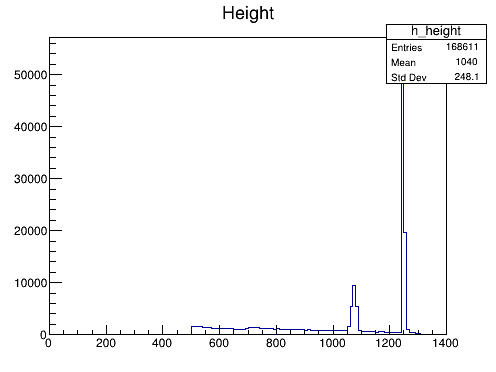

In [23]:
#define root histogram
h_height = r.TH1F("h_height", "Height", 140, 0, 1400)

#create array from awkward array
heights = arr.array('d', ak.flatten(branches['height']))

#fill the histogram
#inputs are number of entries, values, and weights
h_height.FillN(len(heights), heights, np.ones(len(heights)))

#create a TCanvas to draw on
c1 = r.TCanvas("c1", "c1", 500, 400)

c1.cd()
h_height.Draw()
c1.Draw()

## Iterating Over Multiple Files

The equivalent of TChains is running with uproot iterate. This is what most of the analysis framework is based on.

In [25]:
#define total events 
totalEvents = 0 #count total events
passingEvents = 0 #count events passing cuts

#define histograms
h_npulses = r.TH1F("h_npulses", "Number of Pulses", 50, 0, 50)
h_npulsesCut = r.TH1F("h_npulsesCut", "Number of Pulses After Cuts", 50, 0, 50)

#define TCanvas for plotting
c = r.TCanvas("c1", "c1", 1000, 800)

#use the uproot iterate method to loop over all files in our filelist
#https://uproot.readthedocs.io/en/latest/uproot.behaviors.TBranch.iterate.html
for events in uproot.iterate(

        #list of files to run over
        ["MilliQan_Run1190_v34.root"],

        #branches defined above
        ["area", "height", "npulses", "chan", "type"],

        #if we want to make a cut we can define it here
        #note cannot do this with jagged array (ex event and pulse level quantities)
        cut="height>=0",

        #library used to load data
        #default is awkward array (ak), can also use pandas (pd) or numpy (np)
        library = 'ak',

        #number of events or size per batch
        step_size=1000,

        #number of processors
        num_workers=8
    
    ):

        totalEvents += len(events)
            
        #next we can make some cuts on the data
        #ex veto events with hits in top panels
        panel_cut1 = ak.any(events[:, 'chan'] == 68, axis=1) #check if any pulse in event is channel 68 (front top), axis=1 to check for any in event
        panel_cut2 = ak.any(events[:, 'chan'] == 69, axis=1) #back top panel
        
        passing = events[~panel_cut1 & ~panel_cut2]
        passingEvents += len(passing)

        npulses_pre = ak.count(events['npulses'], axis=1) #count number of pulses in events, note cannot use npulses because some events have empty arrays due to cuts
        npulses_post = ak.count(passing['npulses'], axis=1) #count number of pulses after panel cut

        #turn awkward arrays into arrays
        npulses_pre = arr.array('d', npulses_pre.to_list())
        npulses_post = arr.array('d', npulses_post.to_list())

        #fill histograms
        if len(npulses_pre) > 0: h_npulses.FillN(len(npulses_pre), npulses_pre, np.ones(len(npulses_pre)))
        if len(npulses_post) > 0: h_npulsesCut.FillN(len(npulses_post), npulses_post, np.ones(len(npulses_post)))

print("{0} events passing cuts out of {1} total".format(passingEvents, totalEvents))
        
 


128706 events passing cuts out of 206465 total


Warning in <TROOT::Append>: Replacing existing TH1: h_npulses (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_npulsesCut (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Make plot showing the number of pulses before and after cutting on top pannels.

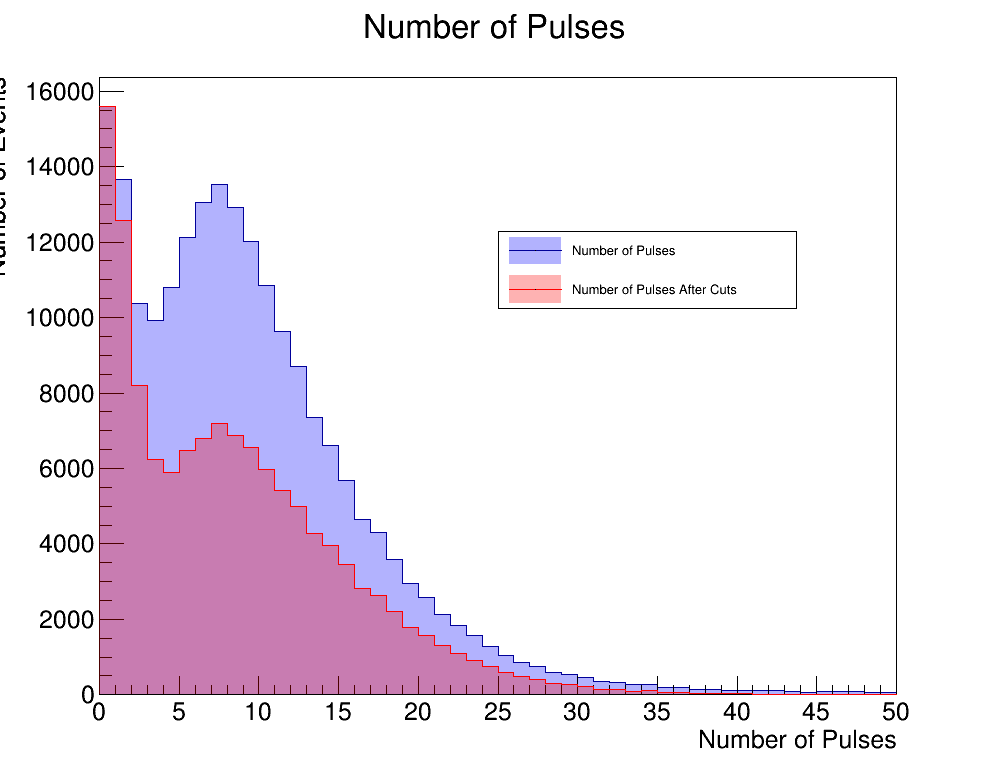

In [26]:
c.cd()

r.gStyle.SetOptStat(0000) #remove stats box

h_npulses.GetYaxis().SetTitle("Number of Events")
h_npulses.GetXaxis().SetTitle("Number of Pulses")
h_npulses.SetFillColorAlpha(4, 0.3)
h_npulses.Draw()
h_npulsesCut.SetLineColor(2)
h_npulsesCut.SetFillColorAlpha(2, 0.3)
h_npulsesCut.Draw("same")

l1 = r.TLegend(0.5, 0.6, 0.8, 0.7)
l1.AddEntry(h_npulses)
l1.AddEntry(h_npulsesCut)
l1.Draw()

c.Draw()

## MilliQan Processor

In [3]:
from milliqanProcessor import *

### MilliQan Cuts